Welcome back! In this lab, we will use pandas library to clean our dataset. 

We will first have a look a data quality issues. And then, we will have a look at time-series data.

Let's read and observe the dataset.

In [ ]:
import pandas as pd
df = pd.read_csv('data_new.csv', header=0)
df.head()

,Unnamed: 0,City,Subscription,Frequency,Discount,Age,Spending,Days on Site
0,0,London,Premium,high,No Discount,63,$98065,97
1,1,Mumbai,NaN,high,No Discount,95,$17551,73
2,2,London,NaN,high,0.2,40,$71100,95
3,3,New York,Premium,low,No Discount,12,$22204,29
4,4,Sydney,Premium,low,0.1,43,$72059,47


Let's begin with making few observations. We can see an 'Unnamed: 0' column, and some null values in Subscription. The values inside 'Discount' column also seem inconsistent. 

Let's see if there are any null values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2000 non-null   int64 
 1   City          2000 non-null   object
 2   Subscription  1006 non-null   object
 3   Frequency     1999 non-null   object
 4   Discount      2000 non-null   object
 5   Age           2000 non-null   int64 
 6   Spending      1999 non-null   object
 7   Days on Site  2000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 125.1+ KB


Before we can drop the null values for 'Frequency' and 'Spending' columns, we need to fix the missing values in Subscription column. 

In [ ]:
df = df.iloc[:, 1:] # getting rid on Unnamed column
df['Subscription'].value_counts()

Premium    1006
Name: Subscription, dtype: int64

Maybe we can begin with adding a replacement string

In [ ]:
replacement = lambda val: 1 if val=='Premium' else 0
df['Subscription'] = df['Subscription'].apply(replacement)
df.head()

,City,Subscription,Frequency,Discount,Age,Spending,Days on Site
0,London,1,high,No Discount,63,$98065,97
1,Mumbai,0,high,No Discount,95,$17551,73
2,London,0,high,0.2,40,$71100,95
3,New York,1,low,No Discount,12,$22204,29
4,Sydney,1,low,0.1,43,$72059,47


Now that we have some control over missing values, we can conviniently drop the remaining missing values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          2000 non-null   object
 1   Subscription  2000 non-null   int64 
 2   Frequency     1999 non-null   object
 3   Discount      2000 non-null   object
 4   Age           2000 non-null   int64 
 5   Spending      1999 non-null   object
 6   Days on Site  2000 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 109.5+ KB


In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1998 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          1998 non-null   object
 1   Subscription  1998 non-null   int64 
 2   Frequency     1998 non-null   object
 3   Discount      1998 non-null   object
 4   Age           1998 non-null   int64 
 5   Spending      1998 non-null   object
 6   Days on Site  1998 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 124.9+ KB


Let's have a look at our data again. Is all good?

In [ ]:
df.head()

,City,Subscription,Frequency,Discount,Age,Spending,Days on Site
0,London,1,high,No Discount,63,$98065,97
1,Mumbai,0,high,No Discount,95,$17551,73
2,London,0,high,0.2,40,$71100,95
3,New York,1,low,No Discount,12,$22204,29
4,Sydney,1,low,0.1,43,$72059,47


We have string values in our dataset. In order to utilize this dataset for Machine Learning, we need it to be all numbers only.

In order to convert strings to numbers, we are going to consider two approaches:



*   Label Encoding
*   One-Hot Encoding



Observe the column 'Frequency'. Is the value 'high' qualitatively greater than 'low'? In such scenarios, we can replace them with numbers- maybe 0 for 'low', and 1 for 'high'. Directly replacing the words with their numeric encodings is Label Encoding. Its quite similar to dictionary supporting key-value pairs.

In [ ]:
df['Frequency'].value_counts()

high    1023
low      975
Name: Frequency, dtype: int64

In [ ]:
replacement = lambda val: 1 if val=='high' else 0
df['Frequency'] = df['Frequency'].apply(replacement)
df.head()

,City,Subscription,Frequency,Discount,Age,Spending,Days on Site
0,London,1,1,No Discount,63,$98065,97
1,Mumbai,0,1,No Discount,95,$17551,73
2,London,0,1,0.2,40,$71100,95
3,New York,1,0,No Discount,12,$22204,29
4,Sydney,1,0,0.1,43,$72059,47


But what about the 'City' column? London, New York, Sydney or Mumbai do not have a supporting mathematical relationship- in fact, their features may be significantly different from each other. When there is an independence amongst the values of a column, go with One-Hot encoding. 

In [ ]:
df = pd.get_dummies(df, columns=['City'])
df.head()

,Subscription,Frequency,Discount,Age,Spending,Days on Site,City_London,City_Mumbai,City_New York,City_Sydney
0,1,1,No Discount,63,$98065,97,1,0,0,0
1,0,1,No Discount,95,$17551,73,0,1,0,0
2,0,1,0.2,40,$71100,95,1,0,0,0
3,1,0,No Discount,12,$22204,29,0,0,1,0
4,1,0,0.1,43,$72059,47,0,0,0,1


Discuss- what is the advantage of these new columns? Can they help us with filtering the data? Can they help us build better features?

Observe the 'Discount' column. While we have most discount values as numbers, there is a 'No Discount' lurking amongst them. Is there a way we could handle this without encoding?

In [ ]:
replacement = lambda val: 0.0 if val=='No Discount' else val
df['Discount'] = df['Discount'].apply(replacement)
df.head()

,Subscription,Frequency,Discount,Age,Spending,Days on Site,City_London,City_Mumbai,City_New York,City_Sydney
0,1,1,0.0,63,$98065,97,1,0,0,0
1,0,1,0.0,95,$17551,73,0,1,0,0
2,0,1,0.2,40,$71100,95,1,0,0,0
3,1,0,0.0,12,$22204,29,0,0,1,0
4,1,0,0.1,43,$72059,47,0,0,0,1


The last column to consider is 'Spending'. It contains values in '$'. However, is everything consistent?

In [ ]:
extract_currency = lambda val: val[0]
spending = set(df['Spending'].apply(extract_currency))
spending

{'$', '₹'}

Looks like there is mix of currencies. Let's check these values out.

In [ ]:
df[df['Spending'].str.contains('₹')]

,Subscription,Frequency,Discount,Age,Spending,Days on Site,City_London,City_Mumbai,City_New York,City_Sydney
42,1,1,0.0,24,₹10000,17,0,1,0,0


Currency conversion should be done with the help of an API which can fetch the latest conversion rates. For our convinience, let's assume that $1 = ₹80

In [ ]:
def change_currency(val):
  conv_rate = 1.0/80
  if val[0] == '$':
    return int(val[1:])
  else:
    return int(val[1:])*conv_rate

df['Spending'] = df['Spending'].apply(change_currency)
df.head()


,Subscription,Frequency,Discount,Age,Spending,Days on Site,City_London,City_Mumbai,City_New York,City_Sydney
0,1,1,0.0,63,98065.0,97,1,0,0,0
1,0,1,0.0,95,17551.0,73,0,1,0,0
2,0,1,0.2,40,71100.0,95,1,0,0,0
3,1,0,0.0,12,22204.0,29,0,0,1,0
4,1,0,0.1,43,72059.0,47,0,0,0,1


Perfect. Now our dataset is all nice and clean. We may need to perform normalization and feature engineering before proceeding to Machine Learning. 

We have now understood some of the important methods to clean data. However, time-series data requires special attention.

In [ ]:

# data from https://community.tableau.com/docs/DOC-1236
!ls

data_new.csv  sample_data  Superstore.csv


In [ ]:
import pandas as pd
df = pd.read_csv('Superstore.csv', parse_dates=['Order Date','Ship Date'])
df.head()
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
df.info() # Observe that there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [ ]:
import warnings
import itertools
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
# for production use, we may want to supress the warning
warnings.filterwarnings("ignore")


Observe the sales dataset. 

In [ ]:
df.head(4)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-12-06,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-11-10,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310


From the output below, we can conclude that best variables for categorical filtering are

Segment, Region, and Categories
Sub Category could also be considered. 

In [ ]:
colNames = df.columns 
for i, feature in enumerate(colNames):
  print(colNames[i] + " " + str(len(df[feature].value_counts())))


Row ID 9994
Order ID 5009
Order Date 1237
Ship Date 1334
Ship Mode 4
Customer ID 793
Customer Name 793
Segment 3
Country 1
City 531
State 49
Postal Code 631
Region 4
Product ID 1862
Category 3
Sub-Category 17
Product Name 1850
Sales 5825
Quantity 14
Discount 12
Profit 7287


Let's have a look at the category column

In [ ]:
df.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

Let's also have a look at the duration of our sales data.

In [ ]:
data = df.loc[df['Category']=='Furniture']  # LOC-> :,:

print('First order data= ',data['Order Date'].min())
print('Last order data= ',data['Order Date'].max())

First order data=  2014-01-03 00:00:00
Last order data=  2017-12-30 00:00:00


Between 2017 and 2014, we should have 4 years of data (1461 days). However, our dataset has many more rows- maybe multiple orders were placed on the same date. Or maybe, no orders were placed on some dates.

In [ ]:
len(data)

2121

Consider the following- what is the feature that we could predict against time? Are we going with regression or classification? 

Is predicting ship mode a valuable business use case?

In [ ]:
df['Ship Mode'].value_counts()


Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

SQL would have been very handy in such scenarios. Group By and Order By operations are very helpful in data cleaning. Luckily- pandas can handle our SQL needs.

In [ ]:
data_grouped = data.groupby('Order Date')
data_grouped = data_grouped['Sales'].sum().reset_index()
data_grouped.tail()

,Order Date,Sales
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180
888,2017-12-30,323.1360


Observation- do we have sales on all the days?

Moral of the story- Missing values are not always NULL

In [ ]:

data_grouped.set_index('Order Date', inplace=True)
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html
y = data_grouped['Sales'].resample('MS').mean() # average sales of month will be a BETTER prediction than TOTAL sales 
y.head()


Order Date
2014-01-01    864.733571
2014-02-01    248.475714
2014-03-01    800.669889
2014-04-01    525.167692
2014-05-01    390.457467
Freq: MS, Name: Sales, dtype: float64

Now our data is much more in control- for 4 years of data, we have 48 sales value, each representing average monthly sales.

In [ ]:
len(y)

48

In [ ]:
y['2014':'2015']

Order Date
2014-01-01     864.733571
2014-02-01     248.475714
2014-03-01     800.669889
2014-04-01     525.167692
2014-05-01     390.457467
2014-06-01     611.823918
2014-07-01     601.328500
2014-08-01     729.417324
2014-09-01     844.152147
2014-10-01     818.771824
2014-11-01    1002.974167
2014-12-01    1381.955123
2015-01-01    1463.433262
2015-02-01     894.442556
2015-03-01     758.632233
2015-04-01     674.616300
2015-05-01     696.332806
2015-06-01     462.345456
2015-07-01     733.396412
2015-08-01     906.556600
2015-09-01    1513.551000
2015-10-01     731.694267
2015-11-01     866.242826
2015-12-01     730.189160
Freq: MS, Name: Sales, dtype: float64

Time to visualize our sales

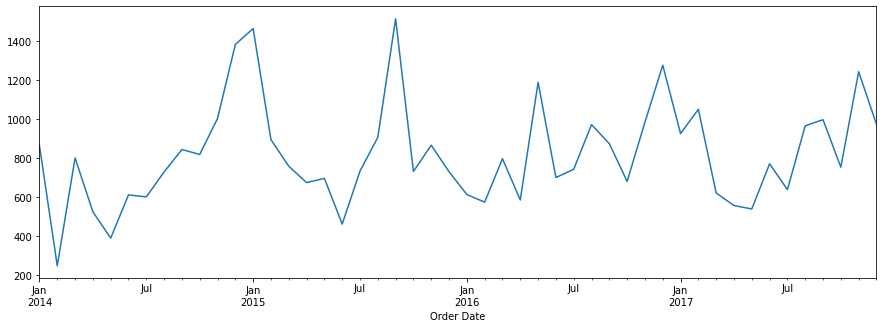

In [ ]:

plt.figure()
y.plot(figsize=(15,5))
plt.show()


Great! Now you know how to clean the data. We will be building a machine learning model on this clean data in the future labs.